In [1]:
import nltk  # natural language toolkit
import random  # Python builtin library for generating pseudo-radom values. Builtin libraries come with the basic Python install - no need to install them separately.
import requests  # Builtin library for requests.


from bs4 import BeautifulSoup  # beautiful soup libary for grabbing data from html base
from urllib import request # library for requests
from PIL import Image  # Python image library. Please note not all library names are the same as import names. For example, this one is called 'pillow'


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/marysia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/marysia/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Introduction
Today we are going to touch on the below<br>
    - Recap Load data from an online source and load data from a file.<br>
    - Introduction to web scraping.<br>
    - Manipulate, inspect and probe the data.<br>
    - Databases introduction<br>

## Grabbing Data Recap
Last week we looked at grabbing data from a website and text file. This week we will be looking at grabbing data from a HTML which we give us an understanding to next week's lecture which will involve web scraping but before we get there a recap

In [2]:
# Using a get request to get data
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = requests.get(url)
full_text_url = response.content.decode("utf8")
(len(full_text_url))

1176812

In [3]:
# Getting data from a file
file = open("../week01/2554-0.txt", "r")
full_text = file.read()
file.close()
(len(full_text))

1154369

In [4]:
# Getting data from a file by lines
file = open("../week01/2554-0.txt", "r")
lines = file.readlines()
file.close()
# counting the number of lines in a text
(len(lines))

22443

Lets explore grabbing an image from a url using the PIL library

In [5]:
# grabbing an image from url
image_url = 'https://pbs.twimg.com/profile_images/1189661651521413123/8gS67MVi_400x400.jpg'
response = requests.get(image_url, stream=True)
img = Image.open(response.raw)

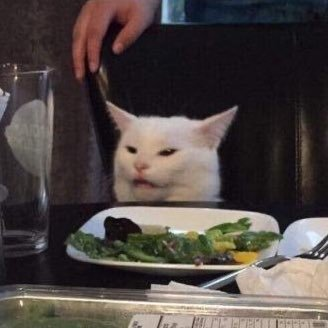

In [6]:
img

###  <span style="color:red"> Exercise 1 </span>
In the cell below practice getting some text or image from a site or file

In [7]:
# getting HTML as text from an URL using the requests library

# IMPORTANT: many websites prohibit scraping in their T&Cs. Please be aware of it before starting a project,
# particularly if you aim to publish it anywhere.

# Good to know: robots.txt files
# https://moz.com/learn/seo/robotstxt
# Wikipedia's robots.txt: https://en.wikipedia.org/robots.txt
URL = "https://en.wikipedia.org/wiki/Narwhal"
data = requests.get(URL)
html_text = data.text  # raw text

In [8]:
# preview the html code using Beautiful Soup
bs_html = BeautifulSoup(html_text, "html.parser")  # Beautiful Soup object, still can be printed as text

In [9]:
print(type(bs_html))

<class 'bs4.BeautifulSoup'>


In [10]:
print(bs_html.prettify())  # this will make the HTML code more readable by adding indentation

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Narwhal - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-dis

In [11]:
root = bs_html.html

In [12]:
root

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Narwhal - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width

In [13]:
dir(root)

['DEFAULT_INTERESTING_STRING_TYPES',
 'EMPTY_ELEMENT_EVENT',
 'END_ELEMENT_EVENT',
 'START_ELEMENT_EVENT',
 'STRING_ELEMENT_EVENT',
 '__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_clone',
 '_event_stream',
 '_find_all',
 '_find_one',
 '_format_tag',
 '_indent_string',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descendant',
 '_namespaces',
 '_should_pretty_print',
 'append',
 'attrs',
 'can_be_empty_element',
 'cdata_list_attributes',
 'childGenerator',
 'chi

In [14]:
root.children

In [15]:
ch_names = [child.name for child in root.children if child.name is not None]

## Grabbing Data from a HTML file
The below will parse the HTML file using Beautiful Soup. This is important as most websites in simple terms are an [HTML file](https://www.w3schools.com/howto/howto_make_a_website.asp)

In [16]:
# getting HTML as text from an URL using the requests library

# IMPORTANT: many websites prohibit scraping in their T&Cs. Please be aware of it before starting a project,
# particularly if you aim to publish it anywhere.

# Good to know: robots.txt files
# https://moz.com/learn/seo/robotstxt
# Wikipedia's robots.txt: https://en.wikipedia.org/robots.txt
URL = "https://en.wikipedia.org/wiki/Narwhal"
data = requests.get(URL)
html_text = data.text  # raw text

soup = BeautifulSoup(html_text, "html.parser")

In [17]:
soup_text = soup.text

#### Note: A well-structured HTML code is crucial for the website's accessibility!

In [18]:
# uncomment the below text to see text from the file
#html_text

But html_text isn't just a string, it is a Beautiful Soup (BS4) object which holds more functionality:

In [19]:
#But raw isn't just a string, it is a Beautiful Soup (BS4) object which holds more functionality:
print(type(soup))

<class 'bs4.BeautifulSoup'>


The following cell parses the HTML Further and actually reads the tags to find the structure of the document.

In [20]:
root = soup.html

The root is also a BS4 object

In [21]:
print(type(root))

<class 'bs4.element.Tag'>


The root object has the below methods:

In [22]:
print(dir(root))

['DEFAULT_INTERESTING_STRING_TYPES', 'EMPTY_ELEMENT_EVENT', 'END_ELEMENT_EVENT', 'START_ELEMENT_EVENT', 'STRING_ELEMENT_EVENT', '__bool__', '__call__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_all_strings', '_clone', '_event_stream', '_find_all', '_find_one', '_format_tag', '_indent_string', '_is_xml', '_lastRecursiveChild', '_last_descendant', '_namespaces', '_should_pretty_print', 'append', 'attrs', 'can_be_empty_element', 'cdata_list_attributes', 'childGenerator', 'children', 'clear', 'contents', 'css', 'decode', 'decode_content

The following cell retrieves the names of all children of root - these will be the 'first descendants', or the first layer of children of the root <html> tags which typically looks like so:

```
<html>
<head><!-- document metadata --></head>
<body><!-- page content      --></body>
</html>
```

In [23]:
root.children

In [24]:
root_children = [e.name for e in root.children if e.name is not None]
print(root_children)

['head', 'body']


The below cells grab all ```<p>``` tags

In [25]:
# "<p> is the tag for a paragraph"
p_tags = root.find_all(['p'])
print("Number of paragraphs:", len(p_tags))
print("Second paragraph:", p_tags[2].text)

Number of paragraphs: 46
Second paragraph: It is mostly found in Arctic waters, and is only vulnerable to predatory attacks from polar bears and orcas. The narwhal typically visits the Baffin Bay, between June and September. After this period, it moves to Davis Strait, a journey that spans around 1,700 km (1,100 mi), and it stays there until April. Its prey mostly consists of  Arctogadus glacialis, Boreogadus saida, Greenland halibut, cuttlefish, shrimp, and armhook squid. The narwhal is one of the deepest-diving marine mammals, with many individuals diving at depths of over 1,500 m (5,000 ft). It mates in the offshore pack ice in April or May, and has a gestation lasting for an average of 15 months. Like most other cetaceans, the narwhal uses clicks, whistles and knocks to communicate with others of its kind.



## Using the Data

### Making Poetry
Now that we have some text we will use the text as a starting point to make something new - a bit like William S. Burroughs [Cut-Ups](https://www.youtube.com/watch?v=Rc2yU7OUMcI&ab_channel=QUEDEAR).

First I want to extract all the text from the ```<p>``` tags above and join them all into one big string:

In [26]:
html_p_tag_text = ' '.join([p_tag.text for p_tag in p_tags])
print(html_p_tag_text)


 The narwhal (Monodon monoceros), is a species of toothed whale. It is a member of the family Monodontidae, and the only species in the genus Monodon. An adult narwhal is typically 3.5 to 5.5 m (11 to 18 ft) in length and 800 to 1,600 kg (1,800 to 3,500 lb) in weight. The most prominent feature of the species is an adult male's long single tusk that can be up to 3 m (9.8 ft). Instead of a dorsal fin, it possesses a shallow dorsal ridge. It is a social animal, and may associate in groups of up to 20 members. Carl Linnaeus scientifically described the species in 1758 in his work Systema Naturae.
 It is mostly found in Arctic waters, and is only vulnerable to predatory attacks from polar bears and orcas. The narwhal typically visits the Baffin Bay, between June and September. After this period, it moves to Davis Strait, a journey that spans around 1,700 km (1,100 mi), and it stays there until April. Its prey mostly consists of  Arctogadus glacialis, Boreogadus saida, Greenland halibut, c


Using a [Conditional Frequency Distribution](https://www.adamsmith.haus/python/docs/nltk.ConditionalFreqDist) from NLTK to find the frequency of a word under a given a condition. Below we can see that the condition is the length of the word, so ConditionalFreqDist() will find how often each word occurs, and group and order them by the length of the words

In [27]:
input_text = "the the the dog dog some other words that we do not care about"

# tokenize words
# tokenization is the proces of turning text into shorter bits (usually: words). It can also involve cleaning the text data.
# This way, the NLP tools such as NLTK can process the text.
# More on tokenization: https://www.geeksforgeeks.org/nlp-how-tokenizing-text-sentence-words-works/
word_tokens = nltk.word_tokenize(input_text)

# More on Conditional Frequence Distribution: https://www.nltk.org/api/nltk.probability.ConditionalFreqDist.html
cfdist = nltk.ConditionalFreqDist()

for word in word_tokens:
    condition = len(word)  # length of the word is the condition
    cfdist[condition][word] += 1

In [28]:
print(type(cfdist[0]))

<class 'nltk.probability.FreqDist'>


cfdist[3] will return all words of length 3 ordered by how often they occur:

In [29]:
cfdist[3]

FreqDist({'the': 3, 'dog': 2, 'not': 1})

###  <span style="color:red"> Exercise 2 </span>
In the cell below use a new condition and create the frequency of a words in sent under a given a condition nltk.ConditionalFreqDist(). Try using operations on strings from the builtin Python methods or from the NLTK library.

In [30]:
new_cfdist = nltk.ConditionalFreqDist()
# write your code here

Below we do something a little more complex. First we create a list of [bigrams](https://en.wikipedia.org/wiki/Bigram) which are simply pairs of words as they appear in the text. By handing ConditionalFreqDist() a list of bigrams we can find out how often a word appears after a given word.

In [31]:
tokens = nltk.word_tokenize(html_p_tag_text)
bigrams = nltk.bigrams(tokens)
bigram_cfd = nltk.ConditionalFreqDist(bigrams)

So if we give index bigram_cfd[] with a word, it will return a list of words ordered by how likely they are to appear after the word we give it. This is a rudimentary version of predictive text you might have on your phone.

Note that the elements in bigram_cfd are actually of type nltk.probability.FreqDist so we need to convert them to a list to view the text

In [32]:
print(type(bigram_cfd[0]))
print(list(bigram_cfd['narwhal']))
print(list(bigram_cfd['Greenland']))

<class 'nltk.probability.FreqDist'>
['is', 'tusk', 'has', 'and', 'tusks', "'s", ';', '(', 'typically', 'uses', 'was', 'split', 'vocal', 'movement', 'pods', 'body', 'products', 'hunted', 'hunts', ',', 'population', 'more', '.']
['halibut', ',', '.', 'and', 'for', 'around', ';', 'round', 'winter', 'experience', 'harvested', 'the']


In [33]:
# How to tokenize without punctuation?
# typically, we would have all imports at the top of the file. This bit is here for clarity about where it ame from.
from nltk.tokenize import RegexpTokenizer

# This is a RegEx tokenizer from the NLTK library. RegEx short for Regular Expression. It can be used to manipulate and create rules for working with text
# in Python and other environments. This is just an example to filter words. Do not worry about it for now.
tokenizer = RegexpTokenizer(r'\w+')

tokens = tokenizer.tokenize(html_p_tag_text)
bigrams = nltk.bigrams(tokens)
bigram_cfd = nltk.ConditionalFreqDist(bigrams)

print(type(bigram_cfd[0]))
print(list(bigram_cfd['narwhal']))
print(list(bigram_cfd['Greenland']))
print(list(bigram_cfd['sea']))

<class 'nltk.probability.FreqDist'>
['is', 'tusk', 'has', 'and', 'tusks', 's', 'Monodon', 'typically', 'uses', 'was', 'split', 'vocal', 'movement', 'pods', 'body', 'products', 'hunted', 'hunts', 'of', 'population', 'more', 'the', 'She', 'her']
['halibut', 'and', 'for', 'around', 'round', 'winter', 'over', 'experience', 'Canadian', 'harvested', '73', 'the', 'such']
['ice', 'called', 'foraging', 'entrapment', 'mammals', 'unicorne']


So now we can pick a random word from our text and then use that to find a list of likely next words. We can use this simple hueristic as a poem generator...

In [34]:
word = random.choice(tokens)
poem = []
poem.append(word)

# generate 15 more words
for i in range(15):
    if word in bigram_cfd:
        next_words = list(bigram_cfd[word].keys())
        word = random.choice(next_words)
        poem.append(word)

print(' '.join(poem))

the blow hole 55 The frequency range and ensuring local variation between environments 61 Other sounds


We could of course do a lot more here like finding rhyming words, or counting syllables, forming verses, perhaps visually structuring the poem...???

###  <span style="color:red"> Exercise 3 </span>
Think of improvements you can make to get a better poem such as
- cleaning the token(e.g try cleaning them removing numbers etc),
- word selected at random
- play around with using the parts of speech of the words
Reference the nltk docs

### <span style="color:red"> Advanced Excercises </span>
1. Try to see how this might work with a trigram in the below cell. Can you notice a difference?
2. Can you build a more advanced web crawler? Try to scrape all the pages connected to the Narwhal page (or the page you used for the web crawler).

Hint: instead of paragraph tags, "\<p>", try to look for hyperlink tags: "\<a>". You may want to filter out the content such as social media links, emailto, etc. For example, on Wikipedia the article page links will have a relative path starting with "/wiki/". News sites will often have categories such as "/uk-news/" before the article - you can have a look directly in the html file or by clicking manually through the website.